In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [8]:
file_path = "/Users/ibrahimuali/Documents/GitHub/Guilty_pleasure/Round_3/round 3.xlsx"
data_day_0 = pd.read_excel(file_path, sheet_name='prices_round_3_day_0')
data_day_1 = pd.read_excel(file_path, sheet_name='prices_round_3_day_1')
data_day_2 = pd.read_excel(file_path, sheet_name='prices_round_3_day_2')

# Combine the data into a single DataFrame
combined_data = pd.concat([data_day_minus_1, data_day_0, data_day_1], ignore_index=True)

# Display the first few rows of the combined dataframe to verify the merge
combined_data.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0


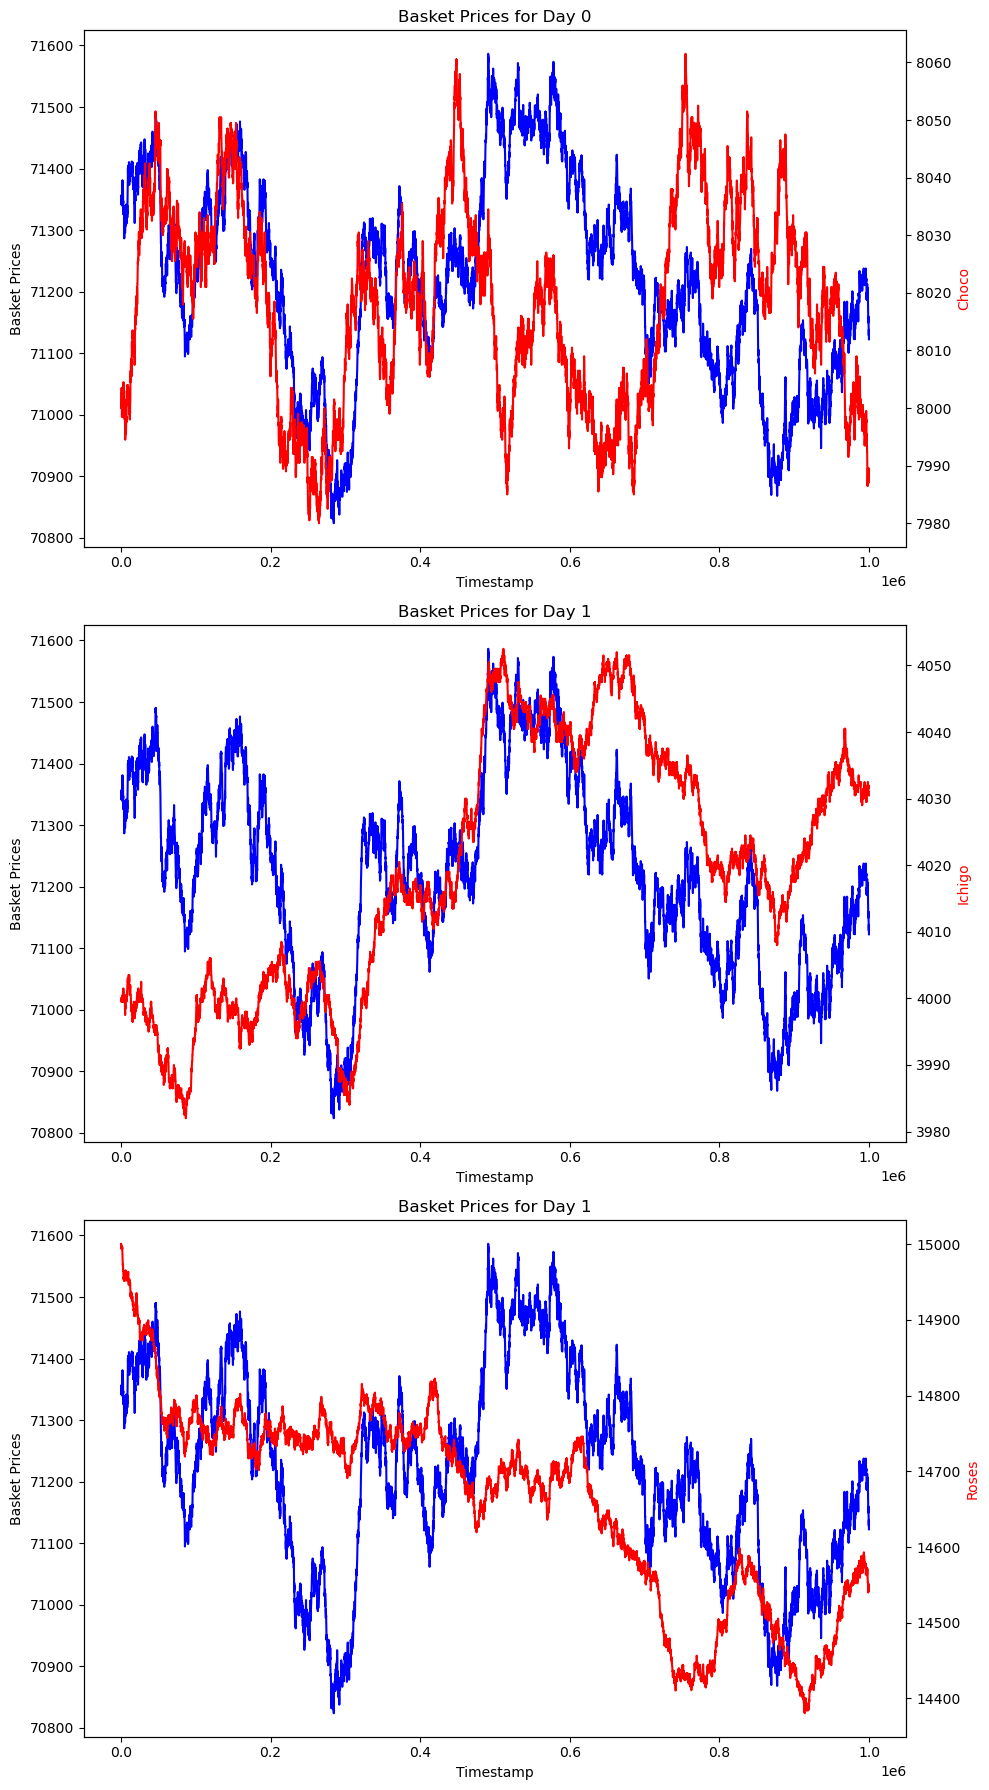

In [24]:
# Create subplots for each day
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

data_choco_0 = data_day_0[data_day_0['product'] == 'CHOCOLATE'][['timestamp', 'mid_price']]
data_gift_0 = data_day_0[data_day_0['product'] == 'GIFT_BASKET'][['timestamp', 'mid_price']]
data_ichigo_0 = data_day_0[data_day_0['product'] == 'STRAWBERRIES'][['timestamp', 'mid_price']]
data_rosa_0 = data_day_0[data_day_0['product'] == 'ROSES'][['timestamp', 'mid_price']]

# Plot for Choco
axs[0].plot(data_gift_0['timestamp'], data_gift_0['mid_price'], color='b', label='Basket Prices')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Basket Prices')
axs[0].set_title('Basket Prices for Day 0')

axs0_secondary = axs[0].twinx()
axs0_secondary.plot(data_gift_0['timestamp'], data_choco_0['mid_price'], color='r', label='Choco')
axs0_secondary.set_ylabel('Choco', color='r')

# Plot for Ichigo
axs[1].plot(data_gift_0['timestamp'], data_gift_0['mid_price'], color='b', label='Basket Prices')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Basket Prices')
axs[1].set_title('Basket Prices for Day 1')

axs0_secondary = axs[1].twinx()
axs0_secondary.plot(data_gift_0['timestamp'], data_ichigo_0['mid_price'], color='r', label='Ichigo')
axs0_secondary.set_ylabel('Ichigo', color='r')

# Plot for Roses
axs[2].plot(data_gift_0['timestamp'], data_gift_0['mid_price'], color='b', label='Basket Prices')
axs[2].set_xlabel('Timestamp')
axs[2].set_ylabel('Basket Prices')
axs[2].set_title('Basket Prices for Day 1')

axs0_secondary = axs[2].twinx()
axs0_secondary.plot(data_gift_0['timestamp'], data_rosa_0['mid_price'], color='r', label='Roses')
axs0_secondary.set_ylabel('Roses', color='r')

plt.tight_layout()
plt.show()

In [65]:
#Day 0
New_data_1 = data_day_0[data_day_0['product'] == 'CHOCOLATE'][['timestamp', 'mid_price']]
New_data_2 = data_day_0[data_day_0['product'] == 'STRAWBERRIES'][['timestamp', 'mid_price']]
New_data_3 = data_day_0[data_day_0['product'] == 'ROSES'][['timestamp', 'mid_price']]
New_data_4 = data_day_0[data_day_0['product'] == 'GIFT_BASKET'][['timestamp', 'mid_price']]

New_data_1.rename(columns = {'mid_price':'Choco'}, inplace = True)
New_data_2.rename(columns = {'mid_price':'Ichigo'}, inplace = True)
New_data_3.rename(columns = {'mid_price':'Rosa'}, inplace = True)
New_data_4.rename(columns = {'mid_price':'Gift'}, inplace = True)

New_data1 = pd.merge(New_data_1, New_data_2, on='timestamp')
New_data2 = pd.merge(New_data_3, New_data_4, on='timestamp')

Day_0 = pd.merge(New_data1, New_data2, on='timestamp')

Day_0['basket'] = 4*Day_0['Choco'] + 6*Day_0['Ichigo']+ Day_0['Rosa']

Day_0['Premium'] = Day_0['Gift'] - Day_0['basket']

Day_0.head()

#Day 1
New_data_1 = data_day_1[data_day_1['product'] == 'CHOCOLATE'][['timestamp', 'mid_price']]
New_data_2 = data_day_1[data_day_1['product'] == 'STRAWBERRIES'][['timestamp', 'mid_price']]
New_data_3 = data_day_1[data_day_1['product'] == 'ROSES'][['timestamp', 'mid_price']]
New_data_4 = data_day_1[data_day_1['product'] == 'GIFT_BASKET'][['timestamp', 'mid_price']]

New_data_1.rename(columns = {'mid_price':'Choco'}, inplace = True)
New_data_2.rename(columns = {'mid_price':'Ichigo'}, inplace = True)
New_data_3.rename(columns = {'mid_price':'Rosa'}, inplace = True)
New_data_4.rename(columns = {'mid_price':'Gift'}, inplace = True)

New_data1 = pd.merge(New_data_1, New_data_2, on='timestamp')
New_data2 = pd.merge(New_data_3, New_data_4, on='timestamp')

Day_1 = pd.merge(New_data1, New_data2, on='timestamp')

Day_1['basket'] = 4*Day_1['Choco'] + 6*Day_1['Ichigo'] + Day_1['Rosa']

Day_1['Premium'] = Day_1['Gift'] - Day_1['basket']

#Day 2
New_data_1 = data_day_2[data_day_2['product'] == 'CHOCOLATE'][['timestamp', 'mid_price']]
New_data_2 = data_day_2[data_day_2['product'] == 'STRAWBERRIES'][['timestamp', 'mid_price']]
New_data_3 = data_day_2[data_day_2['product'] == 'ROSES'][['timestamp', 'mid_price']]
New_data_4 = data_day_2[data_day_2['product'] == 'GIFT_BASKET'][['timestamp', 'mid_price']]

New_data_1.rename(columns = {'mid_price':'Choco'}, inplace = True)
New_data_2.rename(columns = {'mid_price':'Ichigo'}, inplace = True)
New_data_3.rename(columns = {'mid_price':'Rosa'}, inplace = True)
New_data_4.rename(columns = {'mid_price':'Gift'}, inplace = True)

New_data1 = pd.merge(New_data_1, New_data_2, on='timestamp')
New_data2 = pd.merge(New_data_3, New_data_4, on='timestamp')

Day_2 = pd.merge(New_data1, New_data2, on='timestamp')

Day_2['basket'] = 4*Day_2['Choco'] + 6*Day_2['Ichigo'] + Day_2['Rosa']

Day_2['Premium'] = Day_2['Gift'] - Day_2['basket']

print('Premium for Day 0: {:.2f} \nPremium for Day 1: {:.2f} \nPremium for Day 3: {:.2f} \nAvg Premium for 3 Days: {:.2f}'.format(Day_0['Premium'].mean(), Day_1['Premium'].mean(), Day_2['Premium'].mean(),
                                                                                                                                 (Day_0['Premium'].mean()+Day_1['Premium'].mean()+Day_2['Premium'].mean())/3))

Premium for Day 0: 370.23 
Premium for Day 1: 381.94 
Premium for Day 3: 386.30 
Avg Premium for 3 Days: 379.49


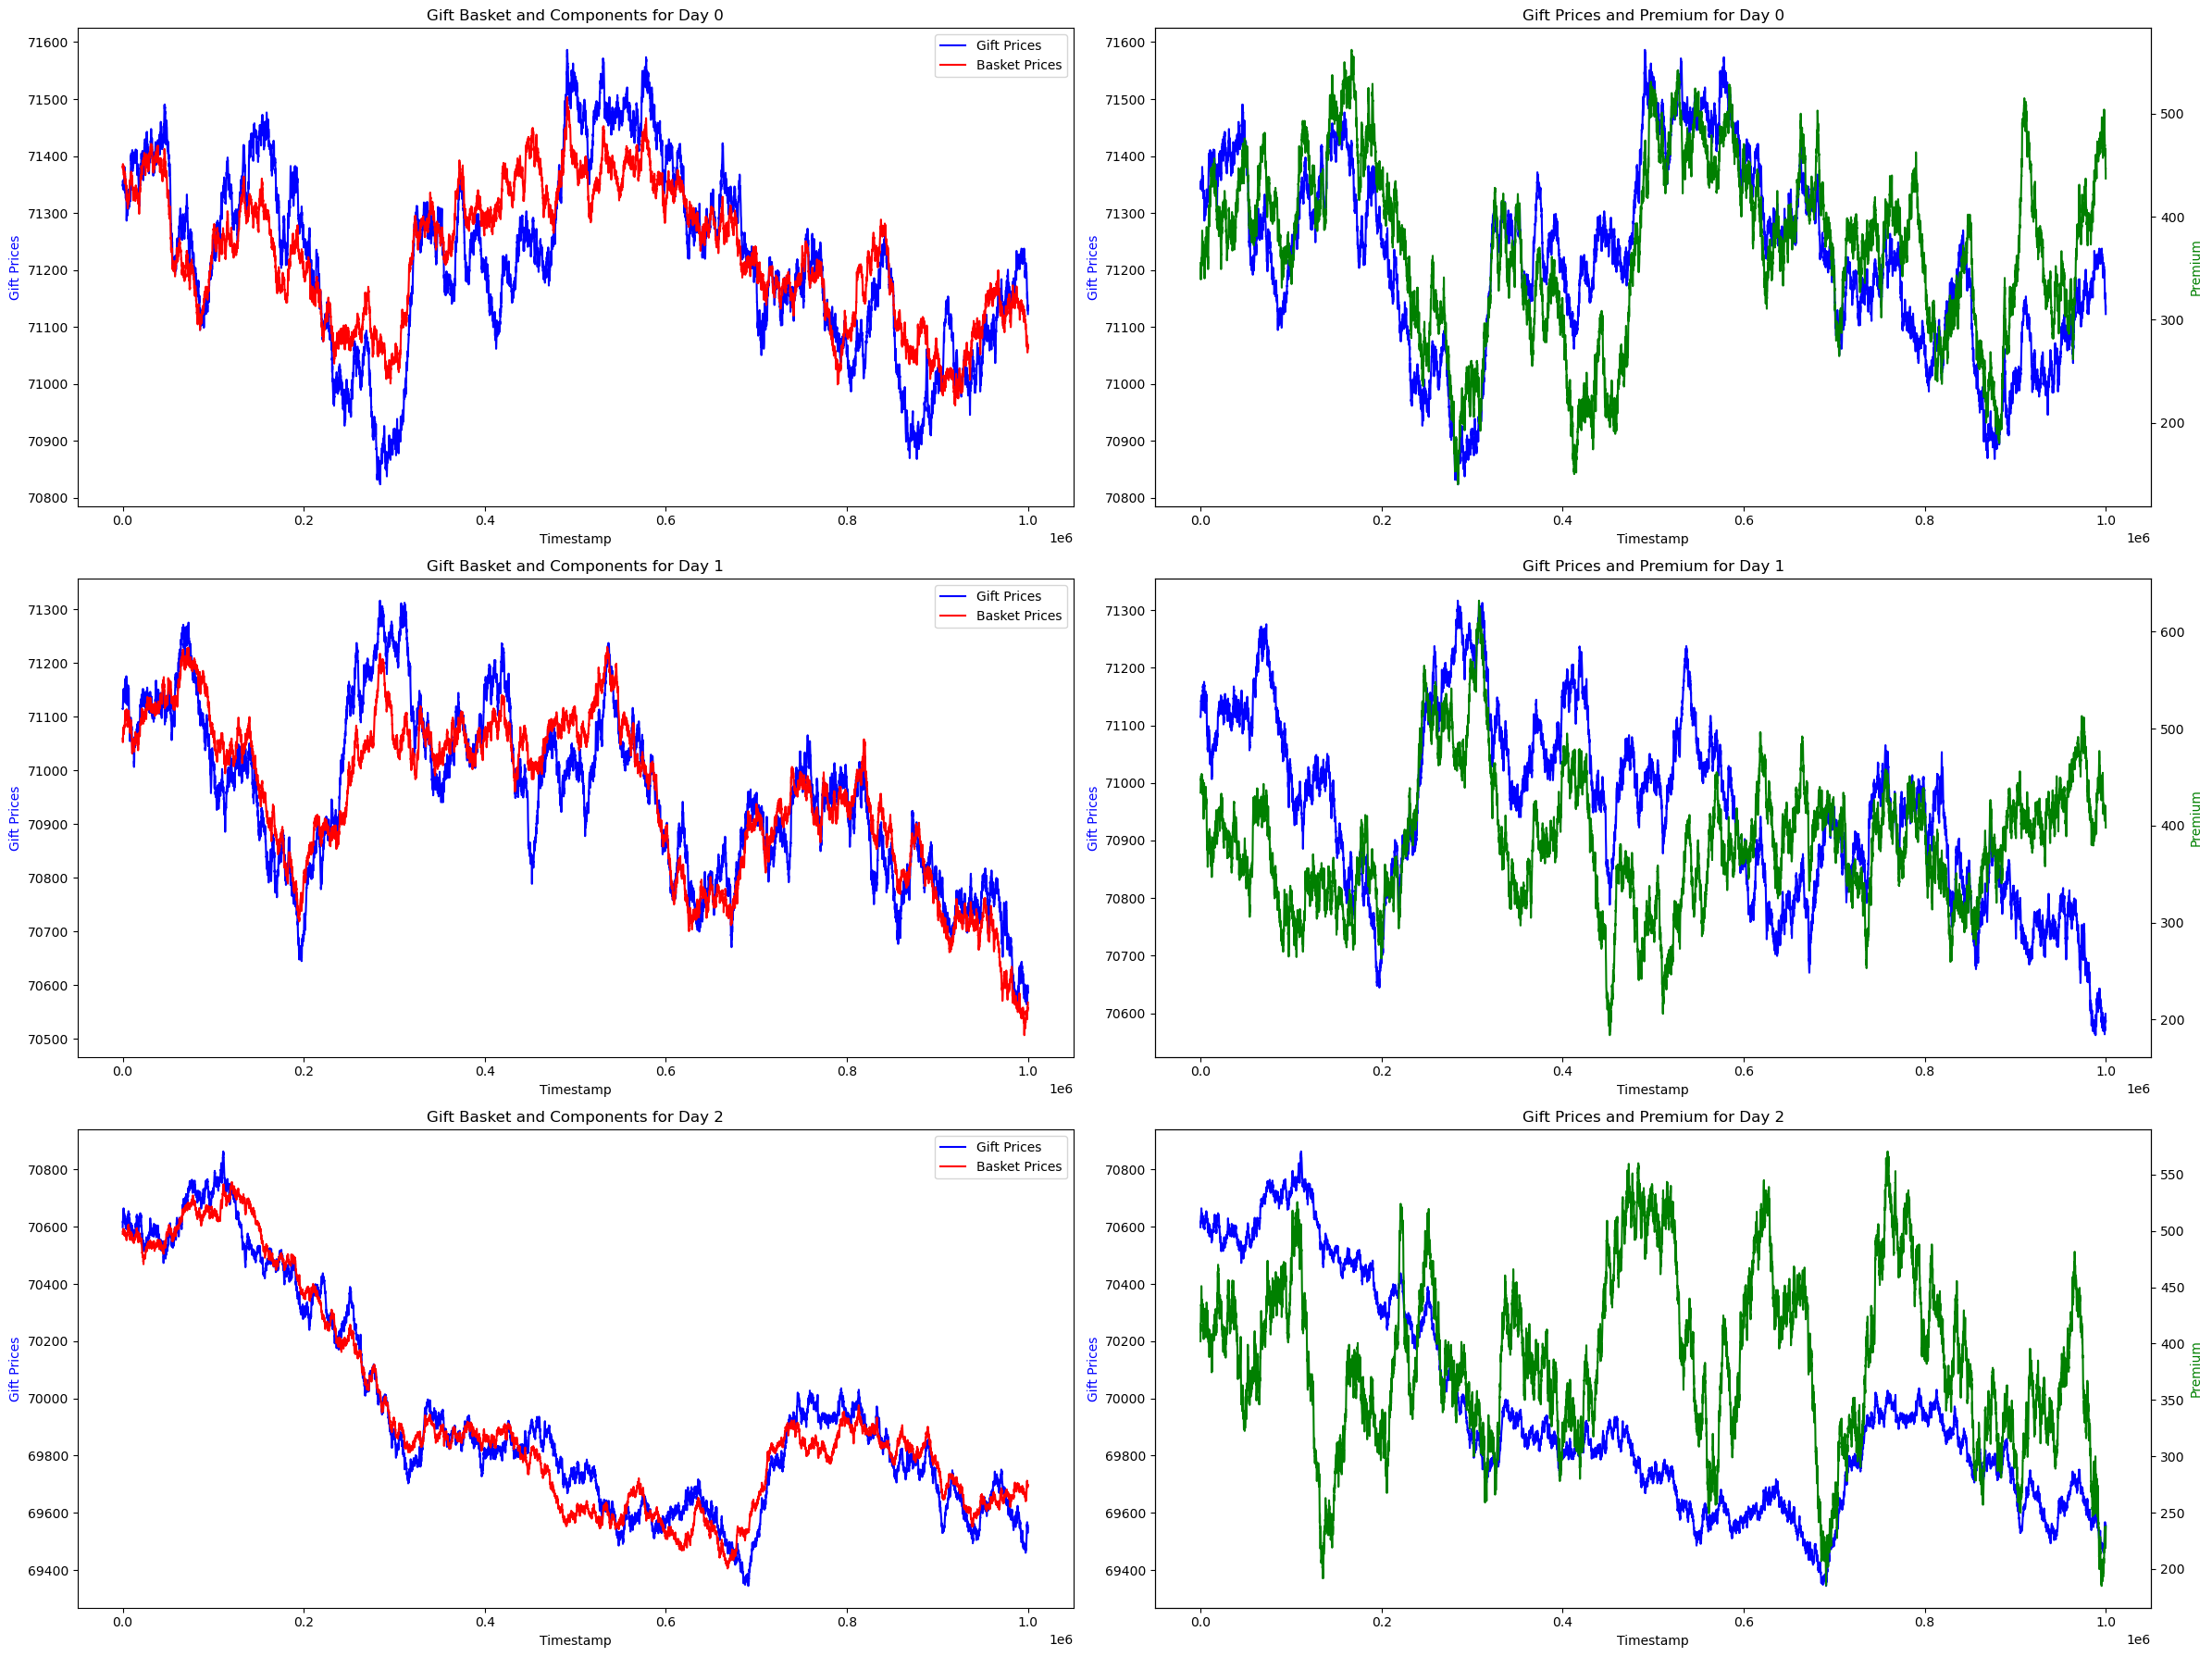

In [75]:
import matplotlib.pyplot as plt

# Create a figure and a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(24, 18))  # Increased width to better accommodate two columns

# Configure plots for each day and each environmental factor
for i, data in enumerate([Day_0, Day_1, Day_2]):
    # Plot orchid prices with sunlight on the first column
    ax1 = axs[i, 0]
    ax1.plot(data['timestamp'], data['Gift'], color='b', label='Gift Prices')
    ax1.plot(data['timestamp'], data['basket']+379, color='r', label='Basket Prices')
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Gift Prices', color='b')
    ax1.set_title(f'Gift Basket and Components for Day {i}')
    ax1.legend()
    #ax1_secondary = ax1.twinx()
    #ax1_secondary.plot(data['timestamp'], data['basket'], color='r', label='Basket Prices')
    #ax1_secondary.set_ylabel('Basket', color='r')
    
    # Plot Gift prices with Premium on the second column
    ax2 = axs[i, 1]
    ax2.plot(data['timestamp'], data['Gift'], color='b', label='Gift Prices')
    ax2.set_xlabel('Timestamp')
    ax2.set_ylabel('Gift Prices', color='b')
    ax2.set_title(f'Gift Prices and Premium for Day {i}')
    ax2_secondary = ax2.twinx()
    ax2_secondary.plot(data['timestamp'], data['Premium'], color='g', label='Premium')
    ax2_secondary.set_ylabel('Premium', color='g')

# Improve the layout to prevent label overlap and add a legend
fig.tight_layout()
#plt.savefig("Orchids_P.png")
plt.show()

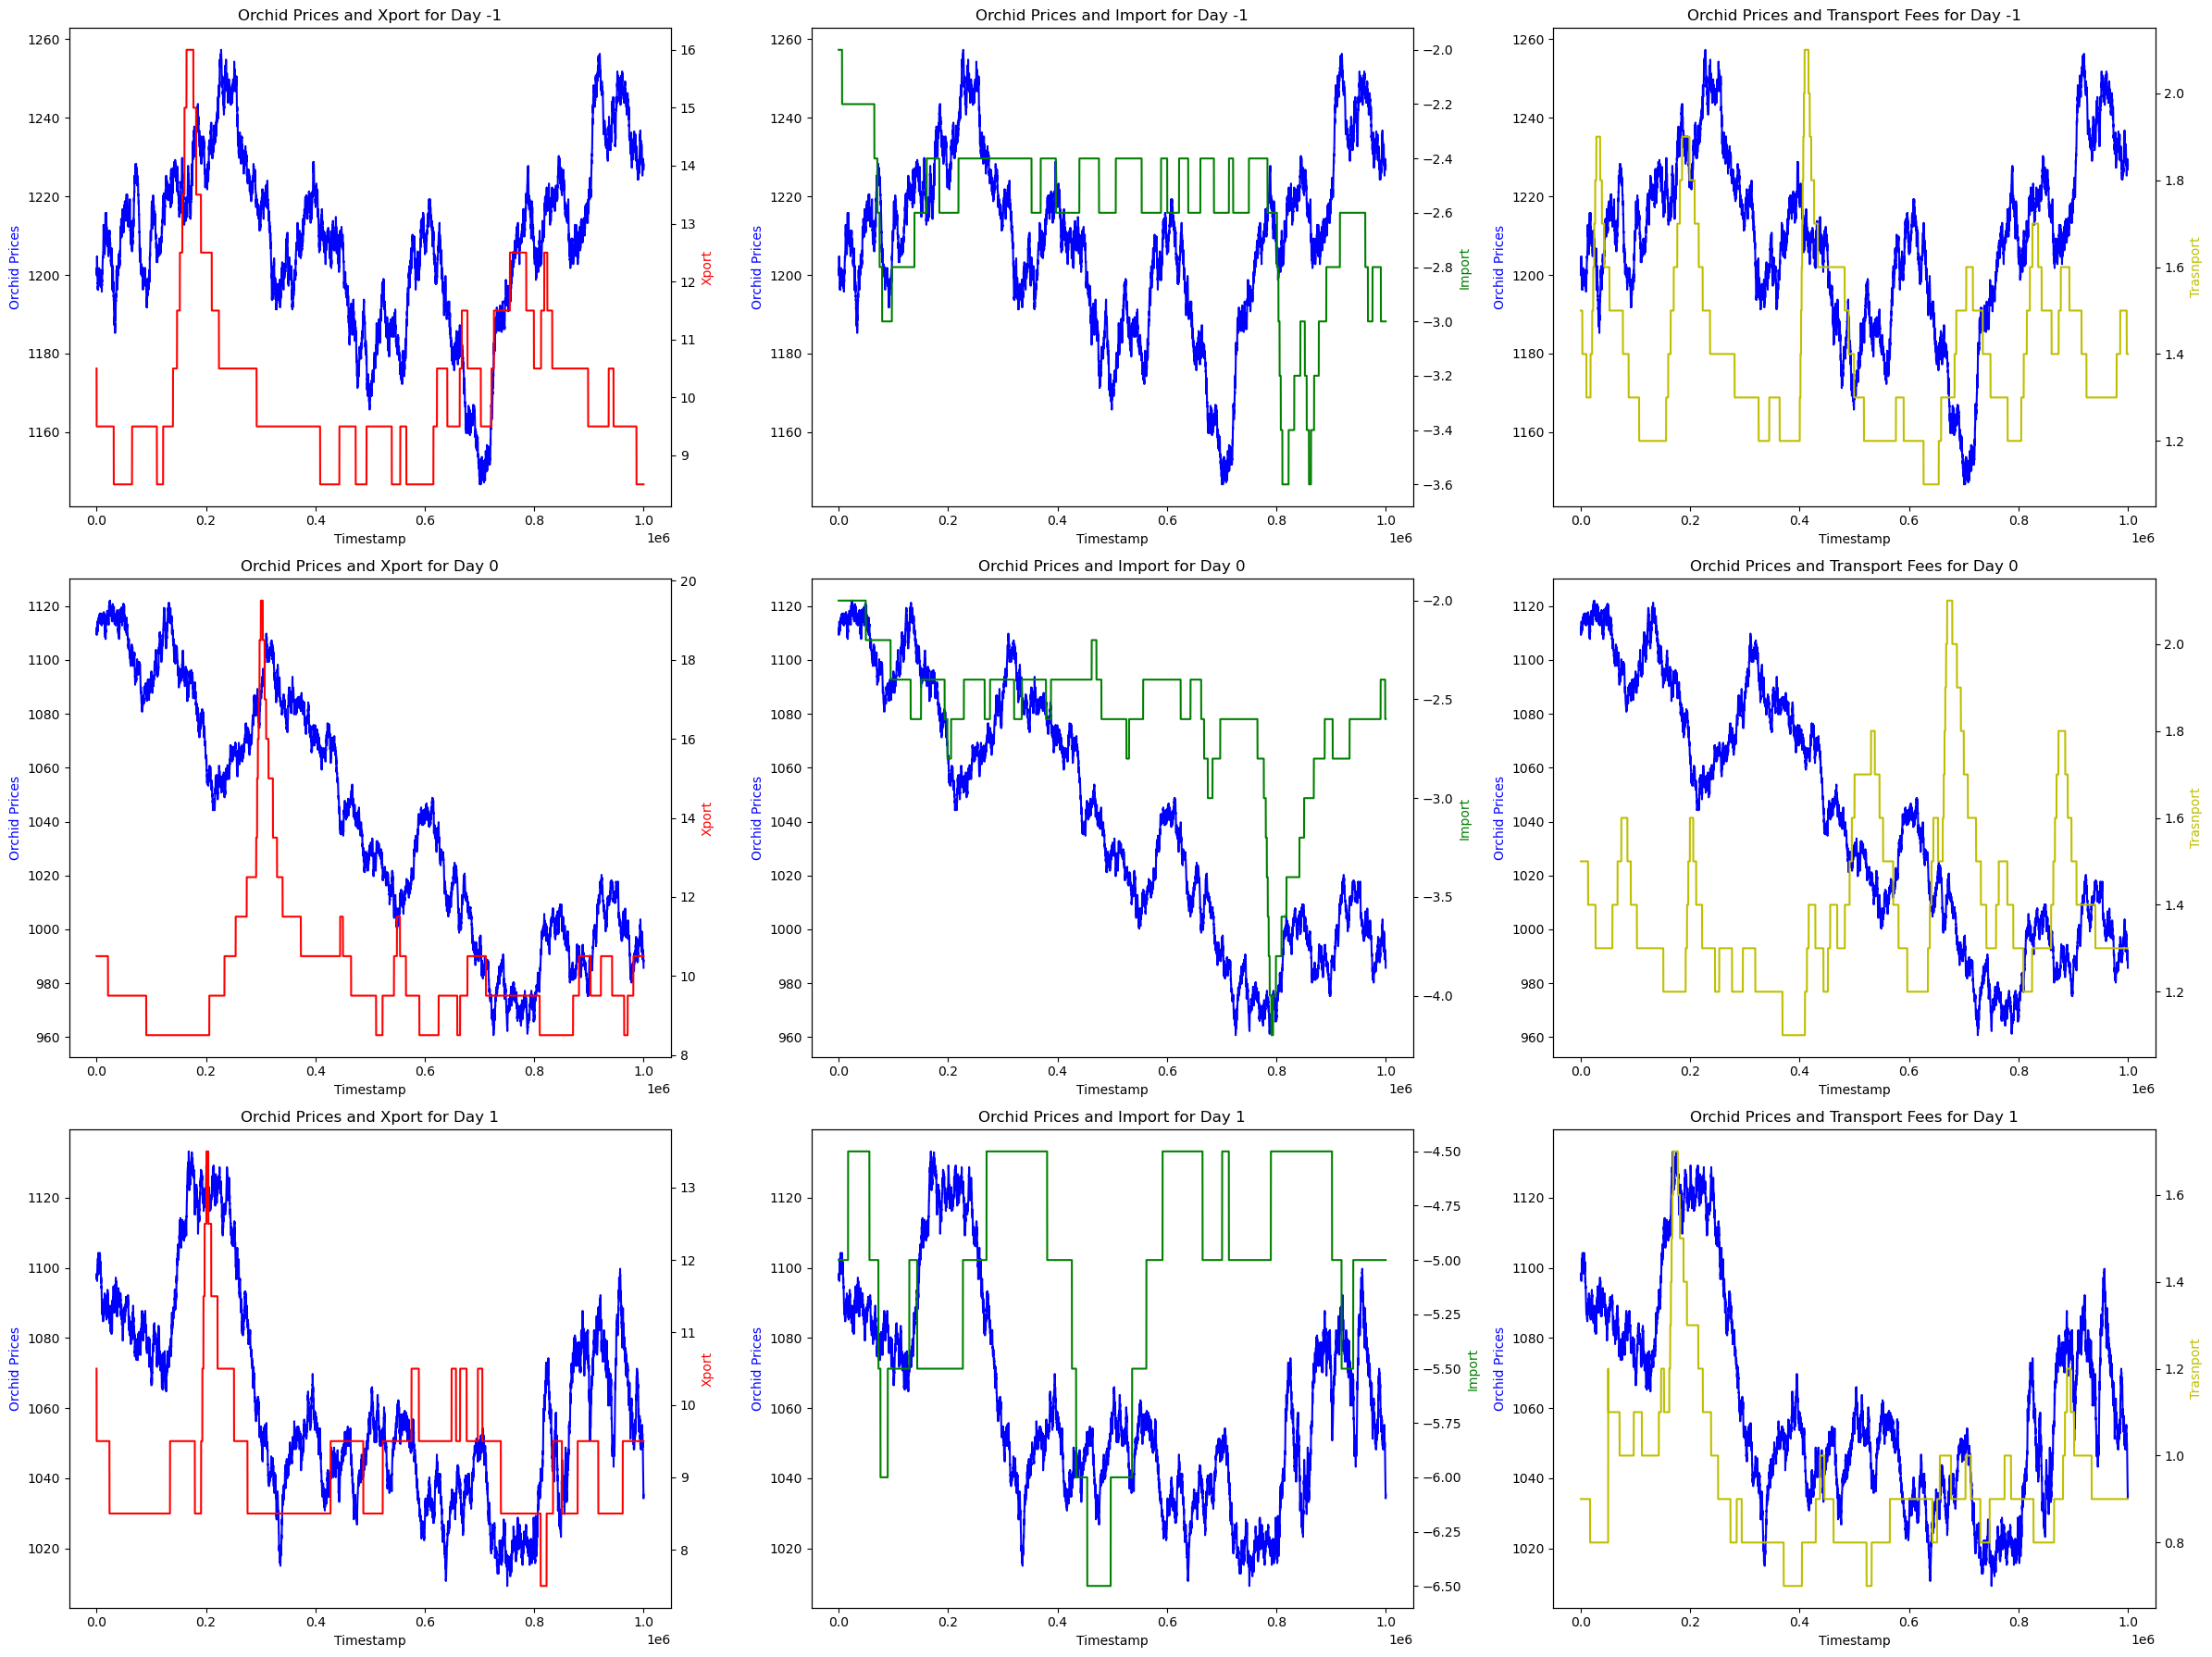

In [38]:
import matplotlib.pyplot as plt

# Assuming you have the following data already defined:
# data_day_minus_1, data_day_0, data_day_1
# Each dataset should contain 'timestamp', 'ORCHIDS', 'SUNLIGHT', and 'HUMIDITY' columns.

# Create a figure and a 3x2 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(24, 18))  # Increased width to better accommodate two columns

# Configure plots for each day and each environmental factor
for i, data in enumerate([data_day_minus_1, data_day_0, data_day_1]):
    # Plot orchid prices with sunlight on the first column
    ax1 = axs[i, 0]
    ax1.plot(data['timestamp'], data['ORCHIDS'], color='b', label='Orchid Prices')
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Orchid Prices', color='b')
    ax1.set_title(f'Orchid Prices and Xport for Day {i-1}')
    ax1_secondary = ax1.twinx()
    ax1_secondary.plot(data['timestamp'], data['EXPORT_TARIFF'], color='r', label='Xport')
    ax1_secondary.set_ylabel('Xport', color='r')
    
    # Plot orchid prices with humidity on the second column
    ax2 = axs[i, 1]
    ax2.plot(data['timestamp'], data['ORCHIDS'], color='b', label='Orchid Prices')
    ax2.set_xlabel('Timestamp')
    ax2.set_ylabel('Orchid Prices', color='b')
    ax2.set_title(f'Orchid Prices and Import for Day {i-1}')
    ax2_secondary = ax2.twinx()
    ax2_secondary.plot(data['timestamp'], data['IMPORT_TARIFF'], color='g', label='Import')
    ax2_secondary.set_ylabel('Import', color='g')

    # Plot orchid prices with humidity on the second column
    ax3 = axs[i, 2]
    ax3.plot(data['timestamp'], data['ORCHIDS'], color='b', label='Orchid Prices')
    ax3.set_xlabel('Timestamp')
    ax3.set_ylabel('Orchid Prices', color='b')
    ax3.set_title(f'Orchid Prices and Transport Fees for Day {i-1}')
    ax3_secondary = ax3.twinx()
    ax3_secondary.plot(data['timestamp'], data['TRANSPORT_FEES'], color='y', label='Trasnport')
    ax3_secondary.set_ylabel('Trasnport', color='y')


# Improve the layout to prevent label overlap and add a legend
fig.tight_layout()
#plt.savefig("Orchids_P.png")
plt.show()